## A notebook for data analysis


In [45]:
# package import
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

In [46]:
# Get the Correlation Matrix by df
def get_cm_by_df(df):
    plt.rcParams["axes.grid"] = False
    f = plt.figure(figsize=(10, 6))
    plt.matshow(df.corr(),cmap=plt.cm.coolwarm, fignum=f.number)
    plt.xticks(range(df.shape[1]), df.columns, fontsize=9, rotation=90)
    plt.yticks(range(df.shape[1]), df.columns, fontsize=9)
    cb = plt.colorbar()
    cb.ax.tick_params(labelsize=14)
    plt.title('Correlation Matrix', fontsize=16)

In [47]:
# read the data
csv_model = pd.read_csv('result_0218_model1.csv').drop('step',axis=1)

csv_model.head()

,initial_population,mean_ini_sugar,mean_ini_vision,mean_ini_metabolism,rate_survive,avg_sugar,dev_sugar,rate_increasable
0,15,13.333333,5.533333,2.133333,0.933333,53.214286,40.023413,0.571429
1,11,18.636364,5.909091,1.909091,0.818182,53.777778,39.870972,0.666667
2,9,20.333333,6.000000,2.666667,0.666667,63.500000,38.898586,0.666667
3,42,11.952381,4.952381,2.404762,0.738095,49.870968,38.149480,0.645161
4,22,15.681818,5.227273,2.545455,0.818182,55.166667,37.974062,0.666667


In [48]:
csv_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   initial_population   9994 non-null   int64  
 1   mean_ini_sugar       9994 non-null   float64
 2   mean_ini_vision      9994 non-null   float64
 3   mean_ini_metabolism  9994 non-null   float64
 4   rate_survive         9994 non-null   float64
 5   avg_sugar            9994 non-null   float64
 6   dev_sugar            9994 non-null   float64
 7   rate_increasable     9994 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 624.8 KB


## Normalization

In [49]:
def normalize_data(df, origin_data, aimed_data):
    df_min = df.loc[:,origin_data].min()
    df_max = df.loc[:,origin_data].max()

    df[aimed_data] = (df.loc[:,origin_data] - df_min)/(df_max-df_min)



In [50]:
normalize_data(csv_model,"avg_sugar", "sugar_mean_normalized")
normalize_data(csv_model,"dev_sugar", "sugar_dev_normalized")
csv_model

,initial_population,mean_ini_sugar,mean_ini_vision,mean_ini_metabolism,rate_survive,avg_sugar,dev_sugar,rate_increasable,sugar_mean_normalized,sugar_dev_normalized
0,15,13.333333,5.533333,2.133333,0.933333,53.214286,40.023413,0.571429,0.664371,1.000000
1,11,18.636364,5.909091,1.909091,0.818182,53.777778,39.870972,0.666667,0.673528,0.995978
2,9,20.333333,6.000000,2.666667,0.666667,63.500000,38.898586,0.666667,0.831528,0.970323
3,42,11.952381,4.952381,2.404762,0.738095,49.870968,38.149480,0.645161,0.610037,0.950559
4,22,15.681818,5.227273,2.545455,0.818182,55.166667,37.974062,0.666667,0.696100,0.945930
...,...,...,...,...,...,...,...,...,...,...
9989,4,14.000000,3.000000,2.250000,0.750000,23.666667,8.504901,0.666667,0.184182,0.168423
9990,11,16.818182,5.636364,2.000000,0.818182,34.777778,7.310571,0.888889,0.364753,0.136912
9991,5,23.200000,6.800000,2.200000,1.000000,24.400000,5.224940,0.800000,0.196100,0.081885
9992,5,17.600000,5.800000,2.800000,0.800000,25.000000,4.082483,0.750000,0.205850,0.051743


In [51]:
# happiness_index = 0.6*rate_survive + 0.1*sugar_mean_normalized + 0.2*sugar_mean_normalized + 0.1*rate_increasable

csv_model["happiness_index"] = 0.6*csv_model.loc[:,"rate_survive"] + 0.1*csv_model.loc[:,"sugar_mean_normalized"] + 0.2*(1-csv_model.loc[:,"sugar_mean_normalized"]) + 0.1*csv_model.loc[:,"rate_increasable"]
csv_model.head()

,initial_population,mean_ini_sugar,mean_ini_vision,mean_ini_metabolism,rate_survive,avg_sugar,dev_sugar,rate_increasable,sugar_mean_normalized,sugar_dev_normalized,happiness_index
0,15,13.333333,5.533333,2.133333,0.933333,53.214286,40.023413,0.571429,0.664371,1.000000,0.750706
1,11,18.636364,5.909091,1.909091,0.818182,53.777778,39.870972,0.666667,0.673528,0.995978,0.690223
2,9,20.333333,6.000000,2.666667,0.666667,63.500000,38.898586,0.666667,0.831528,0.970323,0.583514
3,42,11.952381,4.952381,2.404762,0.738095,49.870968,38.149480,0.645161,0.610037,0.950559,0.646370
4,22,15.681818,5.227273,2.545455,0.818182,55.166667,37.974062,0.666667,0.696100,0.945930,0.687966


## correlation


In [52]:
result = csv_model.drop(["avg_sugar","dev_sugar"],axis=1)
result.corr().round(3)

,initial_population,mean_ini_sugar,mean_ini_vision,mean_ini_metabolism,rate_survive,rate_increasable,sugar_mean_normalized,sugar_dev_normalized,happiness_index
initial_population,1.000,-0.013,-0.011,0.018,-0.954,-0.571,-0.760,-0.551,-0.938
mean_ini_sugar,-0.013,1.000,0.054,-0.007,0.019,0.011,0.137,0.032,-0.002
mean_ini_vision,-0.011,0.054,1.000,0.038,0.082,0.117,0.057,0.006,0.088
mean_ini_metabolism,0.018,-0.007,0.038,1.000,-0.150,-0.327,-0.144,0.029,-0.164
rate_survive,-0.954,0.019,0.082,-0.150,1.000,0.507,0.680,0.482,0.995
rate_increasable,-0.571,0.011,0.117,-0.327,0.507,1.000,0.689,0.258,0.511
sugar_mean_normalized,-0.760,0.137,0.057,-0.144,0.680,0.689,1.000,0.822,0.617
sugar_dev_normalized,-0.551,0.032,0.006,0.029,0.482,0.258,0.822,1.000,0.398
happiness_index,-0.938,-0.002,0.088,-0.164,0.995,0.511,0.617,0.398,1.000


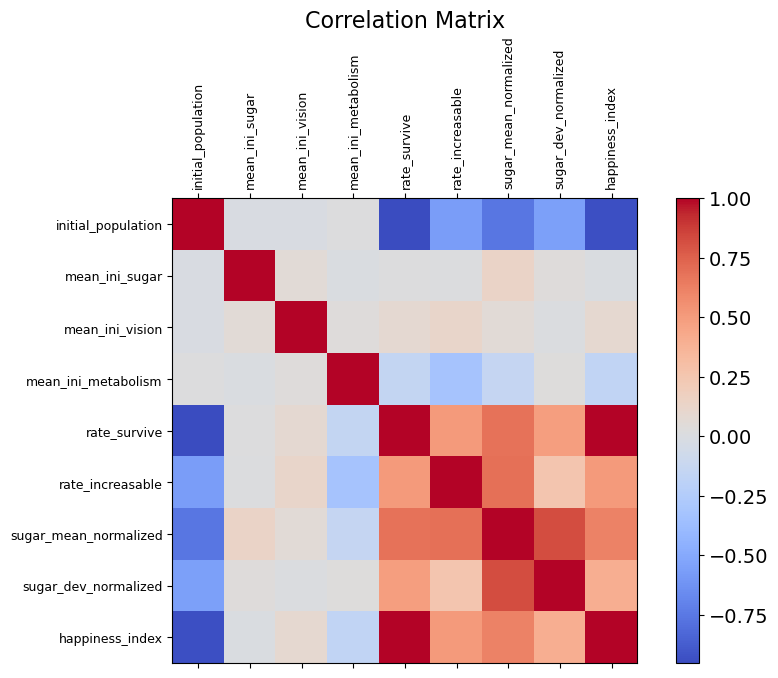

In [53]:
get_cm_by_df(result)

## multiple linear regression

In [54]:
# normalize factors
normalize_data(result,"initial_population", "initial_population_normalized")
normalize_data(result,"mean_ini_sugar", "mean_ini_sugar_normalized")
normalize_data(result,"mean_ini_vision", "mean_ini_vision_normalized")
normalize_data(result,"mean_ini_metabolism", "mean_ini_metabolism_normalized")

In [55]:
x = sm.add_constant(result[['initial_population_normalized','mean_ini_sugar_normalized','mean_ini_vision_normalized','mean_ini_metabolism_normalized']])
y = result[['happiness_index']]

model = sm.OLS(y,x)
model_result = model.fit()
model_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        happiness_index   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                 2.482e+04
Date:                Fri, 24 Feb 2023   Prob (F-statistic):               0.00
Time:                        03:30:55   Log-Likelihood:                 29760.
No. Observations:                9994   AIC:                        -5.951e+04
Df Residuals:                    9989   BIC:                        -5.947e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.7025      0.003    235.889      0.000       0.697       0.708
initial_population_normalized     -0.1313      0.000   -308.805      0.000      -0.132      -0.130
mean_ini_sugar_normalized         -0.0240      0.004     -6.426      0.000      -0.031      -0.017
mean_ini_vision_normalized         0.1026      0.004     27.736      0.000       0.095       0.110
mean_ini_metabolism_normalized    -0.1513      0.003    -49.826      0.000      -0.157      -0.145
==============================================================================
Omnibus:                     7643.150   Durbin-Watson:                   1.479
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1409694.676
Skew:                           2.779   Prob(JB):                         0.00
Kurtosis:                      60.917   Cond. No.                         52.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
# read the data
csv_model2 = pd.read_csv('result_0224_model2.csv').drop('step',axis=1)

csv_model2.head()

,initial_population,ini_metabolism,ini_vision,ini_sugar,rate_survive,avg_sugar,dev_sugar,rate_increasable
0,400,1,1,5,0.8775,45.977208,28.189452,0.743590
1,400,1,1,10,0.8800,59.502841,30.988004,0.778409
2,400,1,1,10,0.8600,57.886628,32.255656,0.755814
3,400,1,1,5,0.8325,49.063063,26.935201,0.795796
4,400,1,1,5,0.8825,47.368272,26.747989,0.798867


In [57]:
# happiness_index = 0.6*rate_survive + 0.1*sugar_mean_normalized + 0.2*sugar_mean_normalized + 0.1*rate_increasable
normalize_data(csv_model2,"avg_sugar", "sugar_mean_normalized")
normalize_data(csv_model2,"dev_sugar", "sugar_dev_normalized")


csv_model2["happiness_index"] = 0.6*csv_model2.loc[:,"rate_survive"] + 0.1*csv_model2.loc[:,"sugar_mean_normalized"] + 0.2*(1-csv_model2.loc[:,"sugar_mean_normalized"]) + 0.1*csv_model2.loc[:,"rate_increasable"]
csv_model2.head()

,initial_population,ini_metabolism,ini_vision,ini_sugar,rate_survive,avg_sugar,dev_sugar,rate_increasable,sugar_mean_normalized,sugar_dev_normalized,happiness_index
0,400,1,1,5,0.8775,45.977208,28.189452,0.743590,0.445517,0.630161,0.756307
1,400,1,1,10,0.8800,59.502841,30.988004,0.778409,0.579494,0.692722,0.747892
2,400,1,1,10,0.8600,57.886628,32.255656,0.755814,0.563485,0.721059,0.735233
3,400,1,1,5,0.8325,49.063063,26.935201,0.795796,0.476084,0.602123,0.731471
4,400,1,1,5,0.8825,47.368272,26.747989,0.798867,0.459296,0.597938,0.763457


## rate_survive

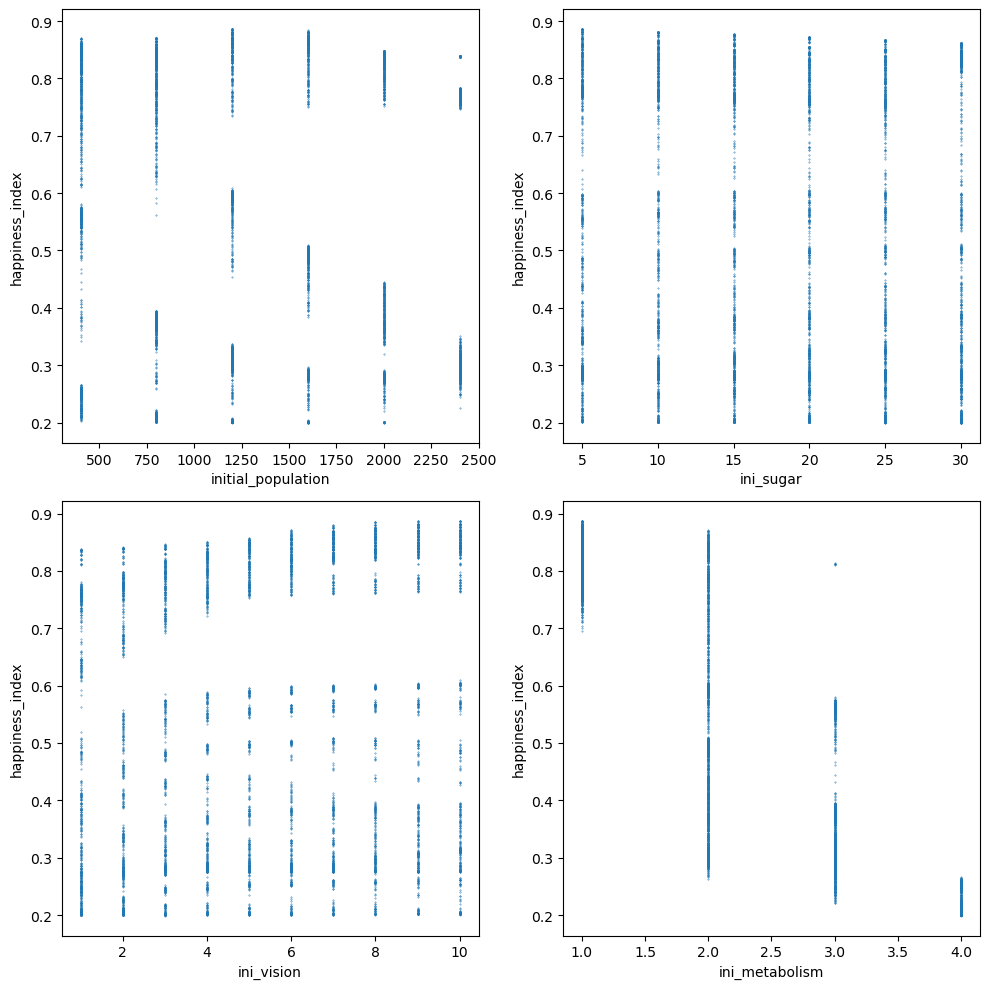

In [58]:
plt.figure(figsize=(10,10))
plt.title('Model 2 data overview')

plt.subplot(2,2,1)
plt.xlabel('initial_population')
plt.ylabel('happiness_index')
plt.scatter(csv_model2['initial_population'], csv_model2['happiness_index'], s=0.1)

plt.subplot(2,2,2)
plt.xlabel('ini_sugar')
plt.ylabel('happiness_index')
plt.scatter(csv_model2['ini_sugar'], csv_model2['happiness_index'], s=0.1)

plt.subplot(2,2,3)
plt.xlabel('ini_vision')
plt.ylabel('happiness_index')
plt.scatter(csv_model2['ini_vision'], csv_model2['happiness_index'], s=0.1)

plt.subplot(2,2,4)
plt.xlabel('ini_metabolism')
plt.ylabel('happiness_index')
plt.scatter(csv_model2['ini_metabolism'], csv_model2['happiness_index'], s=0.1)

plt.tight_layout()



In [59]:
csv_model2_sub = csv_model2.query("initial_population==1200")
csv_model2_sub

,initial_population,ini_metabolism,ini_vision,ini_sugar,rate_survive,avg_sugar,dev_sugar,rate_increasable,sugar_mean_normalized,sugar_dev_normalized,happiness_index
2340,1200,1,1,5,0.855833,26.928919,12.081344,0.802337,0.256836,0.270073,0.768050
2341,1200,1,1,5,0.867500,26.281460,11.827304,0.803074,0.250423,0.264394,0.775765
2343,1200,1,1,5,0.855833,27.149951,12.585648,0.783836,0.259026,0.281346,0.765981
2344,1200,1,1,5,0.848333,27.550098,13.474618,0.783890,0.262989,0.301218,0.761090
2347,1200,1,1,5,0.857500,26.788144,11.917184,0.798834,0.255442,0.266403,0.768839
...,...,...,...,...,...,...,...,...,...,...,...
3416,1200,4,10,30,0.003333,1.250000,0.500000,0.000000,0.002476,0.011177,0.201752
3418,1200,4,10,30,0.003333,1.000000,0.000000,0.000000,0.000000,0.000000,0.202000
3419,1200,4,10,25,0.002500,1.000000,0.000000,0.000000,0.000000,0.000000,0.201500
3423,1200,4,10,30,0.005000,1.333333,0.516398,0.000000,0.003302,0.011544,0.202670


Text(0.5, 1.0, 'Model 2 scatter plot')

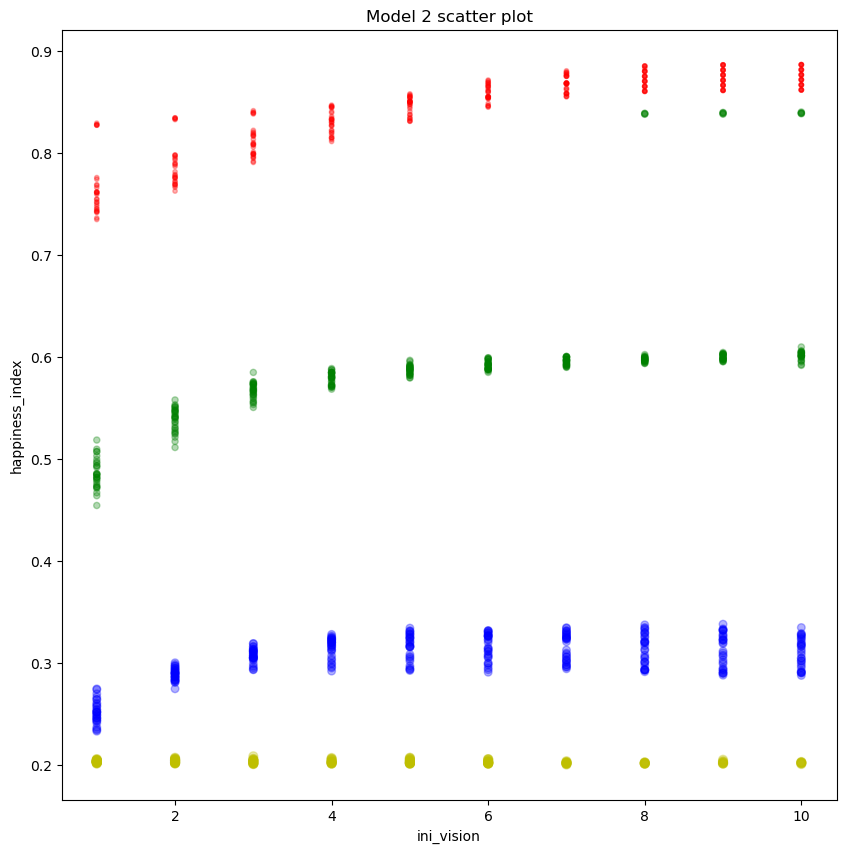

In [60]:
plt.figure(figsize=(10,10))

plt.xlabel('ini_vision')
plt.ylabel('happiness_index')

size = csv_model2_sub['ini_metabolism']
map_color = {1: 'r', 2:'g',3:'b',4:'y'}
color = list(map(lambda x: map_color[x], csv_model2_sub['ini_metabolism']))
plt.scatter(csv_model2_sub['ini_vision'], csv_model2_sub['happiness_index'], s=size*10, c=color, alpha=0.3)
# plt.legend()
plt.title("Model 2 scatter plot")

